# Airbnb project
## Question 1: General trend

## Import relevant packages

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Data gathering

In [151]:
df_listings = pd.read_csv('data/listings.csv.gz')
df_calender = pd.read_csv('data/calendar.csv.gz')
df_reviews = pd.read_csv('data/reviews.csv.gz')

C:\Users\yu298\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Assessing

Let's take a look at the data and see how we can answer the question.
First investigate the reviews data

In [67]:
df_reviews = pd.read_csv('data/reviews.csv.gz')

In [68]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."
...,...,...,...,...,...,...
517821,43228210,624655698,2020-05-13,224347873,Kristin,Manuel was the most hospitable host I have eve...
517822,43330380,624385739,2020-05-10,345757169,Bennet,Top
517823,43339602,624659521,2020-05-13,939311,Jonathan,"Schnelle Kommunikation, das Studio ist neu und..."
517824,43363126,624200722,2020-05-08,345542688,Ernest,Super freundlicher Gastgeber ! Ich war sehr zu...


In [70]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517826 entries, 0 to 517825
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     517826 non-null  int64 
 1   id             517826 non-null  int64 
 2   date           517826 non-null  object
 3   reviewer_id    517826 non-null  int64 
 4   reviewer_name  517826 non-null  object
 5   comments       517498 non-null  object
dtypes: int64(3), object(3)
memory usage: 23.7+ MB


There are no missing values, the data is clean, except for the data type of date.  Let's fix this quickly.

In [71]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

Now lets find out how the number of Airbnb usage has changed over the past decade.  For this, I would simply count the number of reviews as the number of usage.  Leaving a review is not mandatory and thus the figure will not be accurate representative of the total number of usage.  However, I would assume that the portion of customers leaving a review is somewhat constant, and this assumption suffice the purpose of studying the general trend in the Airbnb usage.

In [115]:
df_grouped=df_reviews.groupby([df_reviews['date'].dt.to_period('M')]).size().reset_index(name='count')
df_grouped['3month_RA']=df_grouped.rolling(3).mean()
df_grouped

,date,count,3month_RA
0,2009-06,1,NaN
1,2009-08,1,NaN
2,2009-11,1,1.000000
3,2010-02,1,1.000000
4,2010-04,1,1.000000
...,...,...,...
121,2020-01,13152,13338.000000
122,2020-02,13708,13262.000000
123,2020-03,8517,11792.333333
124,2020-04,912,7712.333333


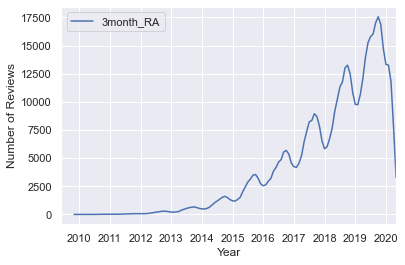

In [116]:
ax=df_grouped.plot(x='date', y='3month_RA', kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
plt.show()

There are few points we can observe from the plot.
- The number of Airbnb usage has been steadily increasing every year.
- There is a periodic pattern that the usage increase during summer and decrease during winter period.
- There is a drastic decrease in usage in the 2020.  Most probably caused by the global pandemic.

Now lets see how the number of listings have changed.  

In [131]:
df_grouped=df_reviews.groupby([df_reviews['date'].dt.to_period('M')])['listing_id'].nunique()
df_grouped=pd.DataFrame(df_grouped).reset_index()
df_grouped['3month_RA']=df_grouped.rolling(3).mean()
df_grouped

,date,listing_id,3month_RA
0,2009-06,1,NaN
1,2009-08,1,NaN
2,2009-11,1,1.000000
3,2010-02,1,1.000000
4,2010-04,1,1.000000
...,...,...,...
121,2020-01,5643,5266.333333
122,2020-02,5226,5304.333333
123,2020-03,4572,5147.000000
124,2020-04,645,3481.000000


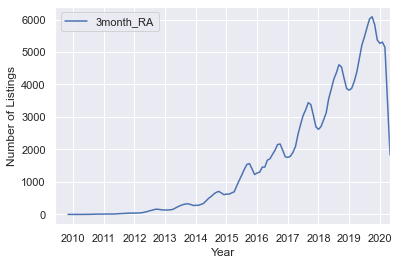

In [133]:
ax=df_grouped.plot(x='date', y='3month_RA', kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Listings')
plt.show()

In [139]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200514190820,2020-05-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.65
1,3176,https://www.airbnb.com/rooms/3176,20200514190820,2020-05-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.09
2,3309,https://www.airbnb.com/rooms/3309,20200514190820,2020-05-15,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.33
3,7071,https://www.airbnb.com/rooms/7071,20200514190820,2020-05-15,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,f,f,moderate,f,f,2,0,2,0,2.24
4,9991,https://www.airbnb.com/rooms/9991,20200514190820,2020-05-15,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,moderate,f,f,1,1,0,0,0.14


In [138]:
df_listings.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24678 entries, 0 to 24677
Data columns (total 106 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24678 non-null  int64  
 1   listing_url                                   24678 non-null  object 
 2   scrape_id                                     24678 non-null  int64  
 3   last_scraped                                  24678 non-null  object 
 4   name                                          24628 non-null  object 
 5   summary                                       23447 non-null  object 
 6   space                                         15953 non-null  object 
 7   description                                   24160 non-null  object 
 8   experiences_offered                           24678 non-null  object 
 9   neighborhood_overview                         13851 non-null

In [159]:
def price_conversion(df,col):
    df.loc[:,col] = df.loc[:,col].str.replace(',','')
    df.loc[:,col] = pd.to_numeric(df.loc[:,col].str.replace('$', ''))

In [166]:
price_conversion(df_listings, 'price')

In [167]:
df_listings['price'].describe()

count    24678.000000
mean        75.109409
std        239.989351
min          0.000000
25%         35.000000
50%         50.000000
75%         79.000000
max       9000.000000
Name: price, dtype: float64

lets see how the price is distributed

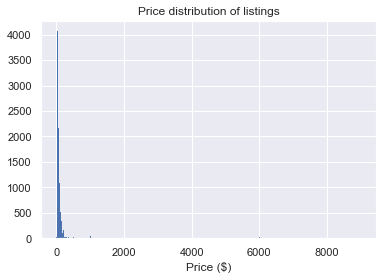

In [173]:
bin_size=10
bin_edges = np.arange(0,df_listings.price.max()+bin_size,bin_size)
plt.hist(data=df_listings, x='price', bins=bin_edges, lw=0);

plt.title('Price distribution of listings')

plt.xlabel('Price ($)');

It is immediately obvioius from the plot that the price is mostly distrubted less than $300, and skewed by some of the outliers (the highest price is $9000).  
For the purpose of grasping the general trend, let's replot the price distribution for those listings with less than $300.

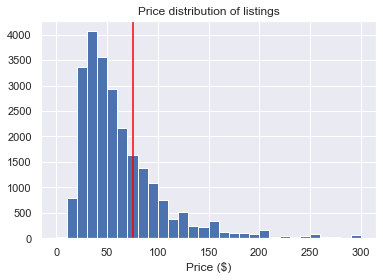

In [179]:
bin_size=10
bin_edges = np.arange(0,300+bin_size,bin_size)
plt.hist(data=df_listings, x='price', bins=bin_edges);

price_mean = df_listings.price.mean() 
plt.axvline(price_mean, 0, 4000, color='red') ## adding the vertical line indicating the mean price
plt.title('Price distribution of listings')

plt.xlabel('Price ($)');

In [180]:
df_listings.price.median()

50.0

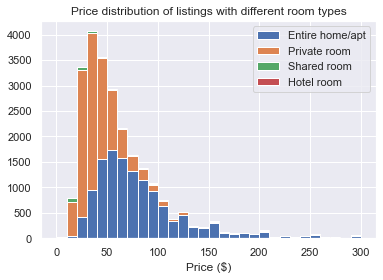

In [227]:
df_room_type = df_listings[['price','room_type']]
room_type_cat = df_listings.room_type.unique().tolist()

## create dictionary with room_type as a key and dataframe only contains the room_type of the key as value
room_type_dict = {}
for i in room_type_cat:
    room_type_dict[i] = pd.DataFrame(df_room_type[df_room_type.room_type==i])

# produce stacked histogram
bin_size=10
bin_edges = np.arange(0,300+bin_size,bin_size)
plt.hist([room_type_dict['Entire home/apt']['price'],
          room_type_dict['Private room']['price'],
          room_type_dict['Shared room']['price'],
          room_type_dict['Hotel room']['price']], 
         bins=bin_edges, stacked=True, label=room_type_cat)
plt.legend()
plt.title('Price distribution of listings with different room types')
plt.xlabel('Price ($)');